# The law of large numbers: a random forest classifier

In [ ]:
#Load pandas and sklearn libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Load general synthethic emails
#https://github.com/iboard-project/synthetic-data/tree/main/dataset
df_general = pd.read_csv("data_general.csv")

In [ ]:
#Load wrongdoings emails
#https://github.com/iboard-project/synthetic-data/tree/main/dataset
df_wrongdoings = pd.read_csv("data_wrongdoings.csv")

In [ ]:
#Set label 0 to general emails
df_general['1'] = 0

In [ ]:
#Check loaded general emails
df_general.head()

,0,1
0,"Dear John,\n\nI hope this email finds you well...",0
1,"Dear CEO,\n\nI am writing to recommend candida...",0
2,"Dear John,\n\nI hope this email finds you well...",0
3,"Dear CEO,\n\nI hope this message finds you wel...",0
4,"Dear Ava Miller,\n\nI hope this email finds yo...",0


In [ ]:
#Set label 1 to wrongdoings emails
df_wrongdoings['1'] = 1

In [ ]:
#Check loaded wrongdoings emails
df_wrongdoings.head()

,0,1
0,"Dear Helen,\n\nI hope this email finds you in ...",1
1,"Dear Sarah,\n\nI am writing to propose the imp...",1
2,"Dear Mark,\n\nI hope this email finds you in g...",1
3,"Dear Jane Smith,\n\nAs the CEO of Acme Corpora...",1
4,"Dear CEO,\n\nI hope this email finds you well....",1


In [ ]:
#Combine all emails into one dataset
data = [df_general, df_wrongdoings]

In [ ]:
#Check combined data
data

[                                                     0  1
 0    Dear John,\n\nI hope this email finds you well...  0
 1    Dear CEO,\n\nI am writing to recommend candida...  0
 2    Dear John,\n\nI hope this email finds you well...  0
 3    Dear CEO,\n\nI hope this message finds you wel...  0
 4    Dear Ava Miller,\n\nI hope this email finds yo...  0
 ..                                                 ... ..
 512  Dear CEO,\n\nI hope this email finds you well....  0
 513  Dear Stephen,\n\nI hope this email finds you w...  0
 514  Dear Katherine Jenkins,\n\nI hope this email f...  0
 515  Dear CEO,\n\nI am writing to request a new cap...  0
 516  Dear John,\n\nI hope this email finds you well...  0
 
 [517 rows x 2 columns],
                                                      0  1
 0    Dear Helen,\n\nI hope this email finds you in ...  1
 1    Dear Sarah,\n\nI am writing to propose the imp...  1
 2    Dear Mark,\n\nI hope this email finds you in g...  1
 3    Dear Jane Smith,\n\nAs 

In [ ]:
#Concatenate data into one dataframe
df_synthetic = pd.concat(data)

In [ ]:
#Check dataframe with synthetic data
df_synthetic

,0,1
0,"Dear John,\n\nI hope this email finds you well...",0
1,"Dear CEO,\n\nI am writing to recommend candida...",0
2,"Dear John,\n\nI hope this email finds you well...",0
3,"Dear CEO,\n\nI hope this message finds you wel...",0
4,"Dear Ava Miller,\n\nI hope this email finds yo...",0
...,...,...
512,"Dear Jake,\n\n I hope this email finds you wel...",1
513,"Dear John,\n\nI hope this email finds you well...",1
514,"Dear Ms. Smith,\n\nI hope this letter finds yo...",1
515,"Dear Eleanor Jacobs,\n\nI hope this email find...",1


In [ ]:
#Separate texts
emails = df_synthetic['0']

In [ ]:
#Check texts
emails

,0
0,"Dear John,\n\nI hope this email finds you well..."
1,"Dear CEO,\n\nI am writing to recommend candida..."
2,"Dear John,\n\nI hope this email finds you well..."
3,"Dear CEO,\n\nI hope this message finds you wel..."
4,"Dear Ava Miller,\n\nI hope this email finds yo..."
...,...
512,"Dear Jake,\n\n I hope this email finds you wel..."
513,"Dear John,\n\nI hope this email finds you well..."
514,"Dear Ms. Smith,\n\nI hope this letter finds yo..."
515,"Dear Eleanor Jacobs,\n\nI hope this email find..."


In [ ]:
#Separate labels
labels = df_synthetic["1"]

In [ ]:
#Check labels
labels

,1
0,0
1,0
2,0
3,0
4,0
...,...
512,1
513,1
514,1
515,1


In [ ]:
#Convert a collection of text documents to a matrix of token counts
cv = CountVectorizer()
features = cv.fit_transform(emails)

In [ ]:
#Check vectorised features
features

<1034x5097 sparse matrix of type '<class 'numpy.int64'>'
	with 119228 stored elements in Compressed Sparse Row format>

In [ ]:
#Split into test, train datasets
x_train, x_test,y_train, y_test = train_test_split(features,labels,test_size = 0.2)

In [ ]:
#Check test labels
y_test

,1
10,1
480,0
305,1
100,0
124,0
...,...
126,1
442,0
477,0
374,0


In [ ]:
#Load Enron corpus to dataframe
#https://www.kaggle.com/code/lixa168/data-science-email
df_enron = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/emails.csv")
df_enron.head(5)

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
#Parse Enron corpus
#Credit: https://www.kaggle.com/code/lixa168/data-science-email

def get_message(Series: pd.Series):
    result = pd.Series(index=Series.index, dtype=str)
    for row, message in enumerate(Series):
        message_words = message.split('\n')
        del message_words[:15]
        result.iloc[row] = ''.join(message_words).strip()
    return result

def get_date(Series: pd.Series):
    result = pd.Series(index=Series.index, dtype=str)
    for row, message in enumerate(Series):
        message_words = message.split('\n')
        del message_words[0]
        del message_words[1:]
        result.iloc[row] = ''.join(message_words).strip()
        result.iloc[row] = result.iloc[row].replace('Date: ', '')
    print('Done parsing, converting to datetime format..')
    return result.apply(pd.to_datetime)

def get_sender_and_receiver(Series: pd.Series):
    sender = pd.Series(index = Series.index, dtype=str)
    recipient1 = pd.Series(index = Series.index, dtype=str)
    recipient2 = pd.Series(index = Series.index, dtype=str)
    recipient3 = pd.Series(index = Series.index, dtype=str)

    for row,message in enumerate(Series):
        message_words = message.split('\n')
        sender[row] = message_words[2].replace('From: ', '')
        recipient1[row] = message_words[3].replace('To: ', '')
        recipient2[row] = message_words[10].replace('X-cc: ', '')
        recipient3[row] = message_words[11].replace('X-bcc: ', '')

    return sender, recipient1, recipient2, recipient3

def get_subject(Series: pd.Series):
    result = pd.Series(index = Series.index, dtype=str)

    for row, message in enumerate(Series):
        message_words = message.split('\n')
        message_words = message_words[4]
        result[row] = message_words.replace('Subject: ', '')
    return result

def get_folder(Series: pd.Series):
    result = pd.Series(index = Series.index, dtype=str)

    for row, message in enumerate(Series):
        message_words = message.split('\n')
        message_words = message_words[12]
        result[row] = message_words.replace('X-Folder: ', '')
    return result

In [ ]:
#Parse Enron corpus into dataframe
#Credit: https://www.kaggle.com/code/lixa168/data-science-email

df_enron['text'] = get_message(df_enron.message)
df_enron['sender'], df_enron['recipient1'], df_enron['recipient2'], df_enron['recipient3'] = get_sender_and_receiver(df_enron.message)
df_enron['Subject'] = get_subject(df_enron.message)
df_enron['folder'] = get_folder(df_enron.message)
df_enron['date'] = get_date(df_enron.message)

Done parsing, converting to datetime format..


In [ ]:
#Check parsed Enron data
df_enron.head()

,file,message,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast,phillip.allen@enron.com,tim.belden@enron.com,,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-14 16:39:00-07:00
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...,phillip.allen@enron.com,john.lavorato@enron.com,,,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",2001-05-04 13:51:00-07:00
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!,phillip.allen@enron.com,leah.arsdall@enron.com,,,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-18 03:00:00-07:00
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy, Can you send me a schedule of the salar...",phillip.allen@enron.com,randall.gay@enron.com,,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-10-23 06:13:00-07:00
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,greg.piper@enron.com,,,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,2000-08-31 05:07:00-07:00


In [ ]:
#Check whether the initial email is identified
df_enron[df_enron['text'].str.contains("a potential sale of Mariner")]

,file,message,text,sender,recipient1,recipient2,recipient3,Subject,folder,date
88788,delainey-d/_sent_mail/55.,Message-ID: <15880209.1075854480433.JavaMail.e...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
89954,delainey-d/all_documents/82.,Message-ID: <29039550.1075854430593.JavaMail.e...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
90738,delainey-d/discussion_threads/561.,Message-ID: <4546772.1075854459062.JavaMail.ev...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
91474,delainey-d/sent/55.,Message-ID: <749272.1075854463849.JavaMail.eva...,X-Origin: Delainey-DX-FileName: ddelain.nsfKen...,david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
269113,lay-k/all_documents/919.,Message-ID: <2288971.1075840226228.JavaMail.ev...,"X-Origin: LAY-KX-FileName: klay.nsfKen, in res...",david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
271085,lay-k/discussion_threads/779.,Message-ID: <13008745.1075840252008.JavaMail.e...,"X-Origin: LAY-KX-FileName: klay.nsfKen, in res...",david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00
273315,lay-k/notes_inbox/688.,Message-ID: <25440421.1075840275667.JavaMail.e...,"X-Origin: LAY-KX-FileName: klay.nsfKen, in res...",david.delainey@enron.com,kenneth.lay@enron.com,X-From: David W Delainey,X-To: Kenneth Lay,Mariner,"X-cc: Jeff Donahue, Raymond Bowen",2000-11-28 12:34:00-08:00


In [ ]:
#Check that all copies of initial emails have been identified
(df_enron[df_enron['text'].str.contains("a potential sale of Mariner")]).shape

(7, 10)

In [ ]:
#Vectorize Enron emails
features_predict = cv.transform(df_enron['text'])

In [ ]:
#Define parameters
number_of_trials = 200
total_suspicious_results = 0
experiment_results = []
plot_trials = []
plot_average_suspicious = []
plot_suspicious = []

In [ ]:
from math import e
#Calculate, save, and print values over a range of trials
for number in range(0, number_of_trials):
  #Load and train Random Forest Classifier
  rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
  rfc.fit(x_train,y_train)
  #Predict labels for Enron emails
  y_pred = rfc.predict(features_predict)

  #Check how many suspicious emails identified
  found = np.where(y_pred == 1)[0]

  #Calculate average for all trials
  total_suspicious_results += len(found)
  divisor = number + 1
  average_suspicious = round((total_suspicious_results / divisor),0)

  #Save experiment data
  experiment_result = [number, divisor, len(found), total_suspicious_results,
                        average_suspicious]

  #Save data for plot
  plot_trials.append(number)
  plot_average_suspicious.append(average_suspicious)
  plot_suspicious.append(len(found))

  #Save experiment data
  experiment_results.append(experiment_result)
  print(experiment_result)

[0, 1, 11439, 11439, 11439.0]
[1, 2, 9486, 20925, 10462.0]
[2, 3, 10934, 31859, 10620.0]
[3, 4, 10503, 42362, 10590.0]
[4, 5, 14511, 56873, 11375.0]
[5, 6, 11359, 68232, 11372.0]
[6, 7, 12538, 80770, 11539.0]
[7, 8, 10702, 91472, 11434.0]
[8, 9, 11335, 102807, 11423.0]
[9, 10, 12255, 115062, 11506.0]
[10, 11, 14035, 129097, 11736.0]
[11, 12, 13484, 142581, 11882.0]
[12, 13, 9370, 151951, 11689.0]
[13, 14, 10231, 162182, 11584.0]
[14, 15, 9137, 171319, 11421.0]
[15, 16, 11774, 183093, 11443.0]
[16, 17, 9632, 192725, 11337.0]
[17, 18, 8633, 201358, 11187.0]
[18, 19, 11776, 213134, 11218.0]
[19, 20, 13020, 226154, 11308.0]
[20, 21, 10196, 236350, 11255.0]
[21, 22, 12940, 249290, 11331.0]
[22, 23, 10582, 259872, 11299.0]
[23, 24, 11018, 270890, 11287.0]
[24, 25, 12743, 283633, 11345.0]
[25, 26, 9345, 292978, 11268.0]
[26, 27, 14442, 307420, 11386.0]
[27, 28, 9671, 317091, 11325.0]
[28, 29, 10255, 327346, 11288.0]
[29, 30, 13137, 340483, 11349.0]
[30, 31, 10727, 351210, 11329.0]
[31, 32, 90

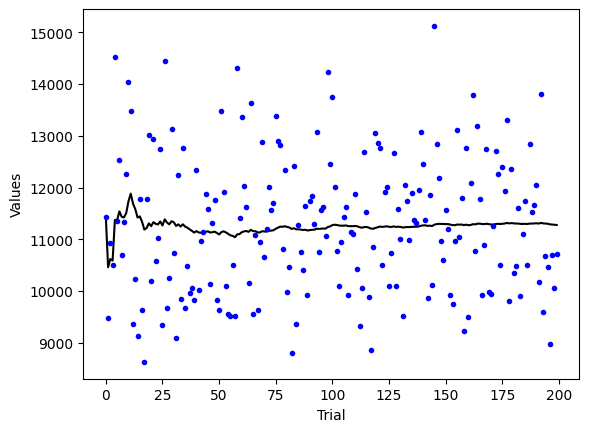

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

#Plot the found suspicious emails
plt.plot(plot_trials, plot_average_suspicious, color='black')
plt.plot(plot_trials, plot_suspicious, '.', color='blue')

#Set axis labels
plt.xlabel("Trial")
plt.ylabel("Values")

#Display the plot
plt.show()

In [ ]:
#Experiment_results to dataframe
df = pd.DataFrame(experiment_results, columns=['Trial_Number', 'Divisor', 'Suspicious_Emails_Found', 'Total_Suspicious_Emails', 'Average_Suspicious_Emails'])

#Calculate summary statistics
summary_stats = df.describe()

print(summary_stats)

       Trial_Number     Divisor  Suspicious_Emails_Found  \
count    200.000000  200.000000                200.00000   
mean      99.500000  100.500000              11276.82500   
std       57.879185   57.879185               1316.30299   
min        0.000000    1.000000               8633.00000   
25%       49.750000   50.750000              10153.50000   
50%       99.500000  100.500000              11199.00000   
75%      149.250000  150.250000              12058.50000   
max      199.000000  200.000000              15120.00000   

       Total_Suspicious_Emails  Average_Suspicious_Emails  
count             2.000000e+02                 200.000000  
mean              1.131287e+06               11246.665000  
std               6.545261e+05                 133.154849  
min               1.143900e+04               10462.000000  
25%               5.633622e+05               11193.000000  
50%               1.131864e+06               11254.000000  
75%               1.696776e+06         

In [ ]:
#Check meaning of range
print((np.min(df.Suspicious_Emails_Found) / df_enron.shape [0]) * 100)
print((np.max(df.Suspicious_Emails_Found) / df_enron.shape [0]) * 100)
print((np.mean(df.Suspicious_Emails_Found) / df_enron.shape [0]) * 100)

1.6685317577662202
2.922298178782028
2.1795135687793414


In [ ]:
#Import seaborn
import seaborn as sns

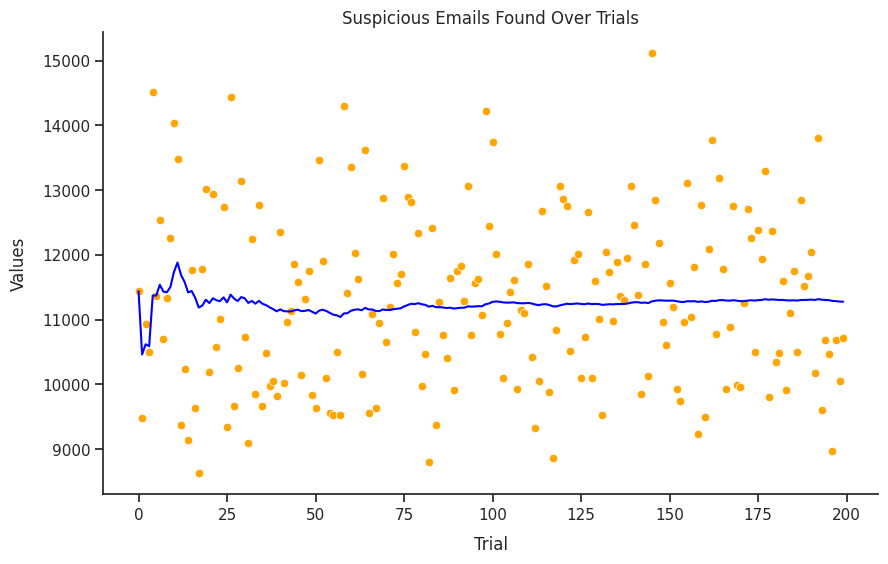

In [ ]:
#Create a DataFrame for easier plotting with Seaborn
df_plot = pd.DataFrame({
    'Trial': plot_trials,
    'Average Suspicious': plot_average_suspicious,
    'Suspicious': plot_suspicious
})

#Set theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

#Set figure size
plt.figure(figsize=(10, 6))

#Plot average suspicious emails
sns.lineplot(data=df_plot, x='Trial', y='Average Suspicious', color='blue')

#Plot individual suspicious email counts
sns.scatterplot(data=df_plot, x='Trial', y='Suspicious', color='orange', marker='o')

#Set axis labels and title
plt.xlabel("Trial",labelpad=10)
plt.ylabel("Values", labelpad=10)
plt.title("Suspicious Emails Found Over Trials")

# Display the plot
plt.show()